In [ ]:
# !pip install xlrd==1.2.0
# !pip install openpyxl

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.decomposition import PCA
plt.ion()
plt.show()

In [2]:
def to_array(features):
    features = ' '.join(features.split()).replace(" ", ",")
    if features[1] == ',':
        features = f"[{features[2:]}"
    features = eval(features)
    return features

# Microarray Analysis

In [3]:
r = pd.read_excel("../reports/microarray_gmm_adapted_ratkowsky_lance.xlsx")

In [4]:
rank = {}
for dataset, g in r.groupby('dataset_name'):
    g["rank_ari"] = g['ari'].rank(method='min', ascending = False)
    g["rank_silhouette"] = g['silhouette'].rank(method='min', ascending = False)
    rank[dataset] = g[g["rank_ari"] ==1]["rank_silhouette"].values[0]

In [5]:
path = '../data/microarray/'

data = pd.read_pickle(f'{path}' + dataset + '.pkl')
truth = data["truth"].values
data = data.drop("truth", axis = 1).values

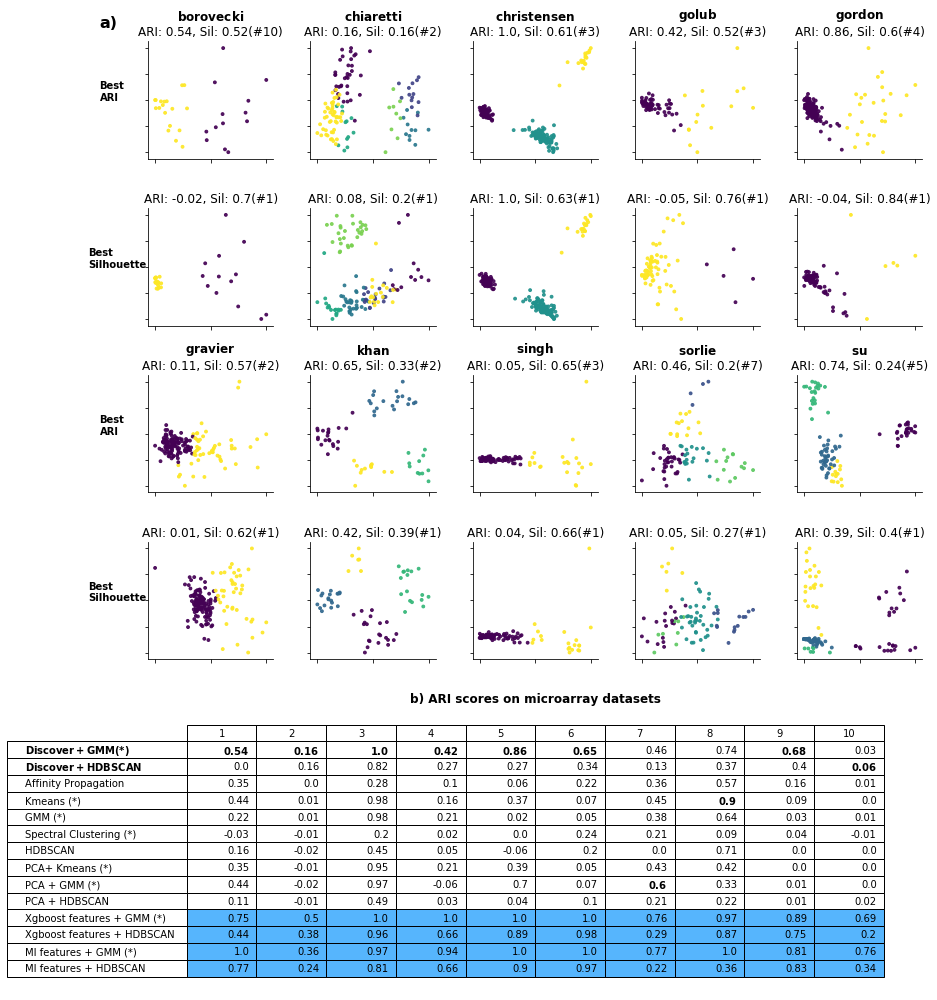

In [30]:
r = pd.read_excel("../reports/microarray_gmm_adapted_ratkowsky_lance.xlsx")
r = r[r["dataset_name"] != "alon"]
fig = plt.figure(figsize = (12,14))

ncol = 5
nrow = 6
gs = fig.add_gridspec(nrow, ncol)
# plt.suptitle("a) Best subpsaces by ARI and Silhouette scores")
for i, (dataset, g) in enumerate(r.groupby('dataset_name')):
    row = (i) //ncol
    row *= 2
    col = i% ncol

    if i >9: # show only 10 datasets
        break

    g["rank_ari"] = g['ari'].rank(method='min', ascending = False)
    g["rank_silhouette"] = g['silhouette'].rank(method='min', ascending = False)
    rank[dataset] = g[g["rank_ari"] ==1]["rank_silhouette"].values[0]
    
    data = pd.read_pickle(f'{path}' + dataset + '.pkl')
    truth = data["truth"].values
    data = data.drop("truth", axis = 1).values

    prop = "rank_ari"
    features = to_array(g[g[prop] ==1]['features'].values[0])
    partition = to_array(g[g[prop] ==1]['partition'].values[0])

    ari = g[g[prop] ==1]['ari'].values[0].round(2)
    silhouette = g[g[prop] ==1]['silhouette'].values[0].round(2)
    rank_silhouette = int(g[g[prop] ==1]['rank_silhouette'].values[0])

    pca_data = PCA(n_components=2, random_state=0).fit_transform(data[:, features])
    pca_data = MinMaxScaler().fit_transform(pca_data)

    ax = fig.add_subplot(gs[row, col])
    title = f"{i+1}. {dataset}"
    plt.title(r'$\bf{}$'.format(dataset) +
        f"\nARI: {ari}, Sil: {silhouette}(#{rank_silhouette})")

    plt.scatter(pca_data[:, 0], pca_data[:, 1], c=partition, alpha = 0.9, s = 8)
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    if i in [0, 5]:
        plt.text( -0.5, 0.5, "Best\nARI", fontweight = "bold")
    if i ==0:
        plt.text( -0.5, 1.2, "a)", fontweight = "bold", fontsize = 16)


    prop = "rank_silhouette"
    features = to_array(g[g[prop] ==1]['features'].values[0])
    partition = to_array(g[g[prop] ==1]['partition'].values[0])

    ari = g[g[prop] ==1]['ari'].values[0].round(2)
    silhouette = g[g[prop] ==1]['silhouette'].values[0].round(2)
    rank_silhouette = int(g[g[prop] ==1]['rank_silhouette'].values[0])

    pca_data = PCA(n_components=2, random_state=3).fit_transform(data[:, features])
    pca_data = MinMaxScaler().fit_transform(pca_data)


    ax = fig.add_subplot(gs[row+1, col])

    plt.title(f"ARI: {ari}, Sil: {silhouette}(#{rank_silhouette})")

    plt.scatter(pca_data[:, 0], pca_data[:, 1], c=partition, alpha = 0.9, s = 8)
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    if i in [0, 5]:
        plt.text(-0.6, 0.5, "Best\nSilhouette", fontweight = "bold")
sns.despine()
plt.tight_layout()


df = pd.read_excel("../results.xlsx", sheet_name = 0)
df["Dataset Index"] = df["Dataset Index"].apply(lambda x: "$\\bf{" + x+  "}$" if x.startswith("Discover") else x)

df = df.set_index("Dataset Index", drop = True)

numeric_scores = df.values[:,1: -1]

values = numeric_scores.copy().astype(str)

for i in range(numeric_scores.shape[1]):
    j = np.argmax(numeric_scores[:, i][:-4])
    values[ j, i]= "$\\bf{" + str(numeric_scores[ j, i]) +  "}$"

# plt.figure(figsize = (12,8))
# ax = plt.subplot(1, 1, 1)

ax = fig.add_subplot(gs[-2:, :])
ax.axis("off")
plt.title("b) ARI scores on microarray datasets", fontweight = "bold")
table = ax.table(cellText=values,
          rowLabels=df.index,
          colLabels=np.arange(numeric_scores.shape[1]).astype(int) +1,
          loc='center'
        )
table.scale(0.9, 1.4)
for r in range(len(values)-3, len(values)+1):
    for c in range(values.shape[1]):
        table[(r, c)].set_facecolor("#56b5fd")

plt.savefig(f"../images/microarray.pdf", bbox_inches='tight')

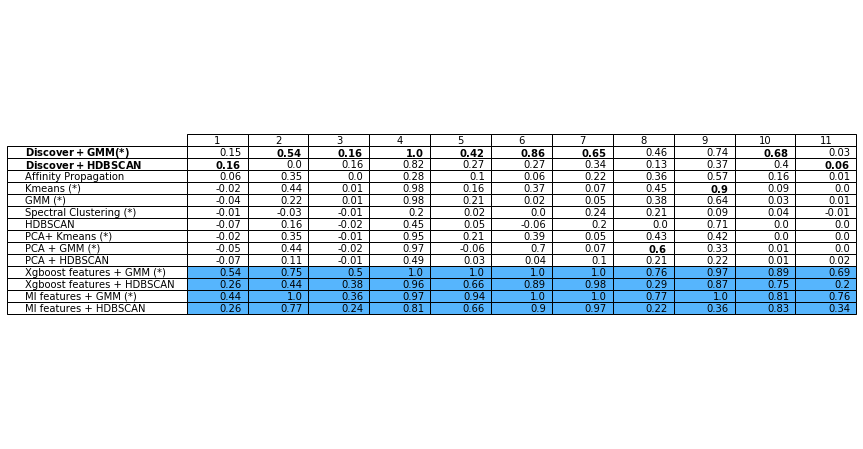

In [29]:
df = pd.read_excel("../results.xlsx", sheet_name = 0)
df["Dataset Index"] = df["Dataset Index"].apply(lambda x: "$\\bf{" + x+  "}$" if x.startswith("Discover") else x)
df = df.set_index("Dataset Index", drop = True)

numeric_scores = df.values[:,: -1]

values = numeric_scores.copy().astype(str)

for i in range(numeric_scores.shape[1]):
    j = np.argmax(numeric_scores[:, i][:-4])
    values[ j, i]= "$\\bf{" + str(numeric_scores[ j, i]) +  "}$"

plt.figure(figsize = (12,8))
ax = plt.subplot(1, 1, 1)
ax.axis("off")
table = ax.table(cellText=values,
          rowLabels=df.index,
          colLabels=df.columns,
          loc='center left'
        )

for r in range(len(values)-3, len(values)+1):
    for c in range(values.shape[1]):
        table[(r, c)].set_facecolor("#56b5fd")
# plt.title("(a)", fontweight = "bold")
# table.scale(0.9, 1.5)
# table.set_fontsize(12)

In [ ]:
["alon", "borovecki", "chiaretti", "christensen", "golub", "gordon", "khan", "sorlie", "su", "yeoh", "west"]


In [ ]:
sns.barplot(y = "Dataset Index", x = 1, data = df)
plt.gca().get_yticklabels()[0].set_fontweight('bold') 
plt.gca().get_yticklabels()[1].set_fontweight('bold') 
plt.gca().get_yticklabels()[-4].set_color('red') 
plt.gca().get_yticklabels()[-3].set_color('red') 
plt.gca().get_yticklabels()[-2].set_color('red') 
plt.gca().get_yticklabels()[-1].set_color('red') 
plt.ylabel("")
plt.xlabel("ARI")
plt.grid()
sns.despine()